# Wczytywanie i Przygotowanie Danych
Import niezbędnych bibliotek, wczytanie danych z pliku CSV, czyszczenie danych i podstawowe transformacje.
- Biblioteki: Użyto bibliotek takich jak pandas do manipulacji danymi oraz matplotlib i seaborn do wizualizacji.
- Dane: Importowane z pliku CSV za pomocą pd.read_csv(). Dane zawierają informacje o 757 próbkach piwa, każda opisana przez 23 kolumny.

- Liczba rekordów: 757
- Kolumny: 23 (w tym 13 float64, 1 int32, 2 int64, 7 object)
- Główne parametry: BeerID, Name, Style, ABV, IBU, Color, etc.
- Brak brakujących wartości (wszystkie kolumny non-null)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data.csv')

df.head()

df.dropna(inplace=True)

df['Size(L)'] = df['Size(L)'].astype(float)
df['OG'] = df['OG'].astype(float)
df['FG'] = df['FG'].astype(float)
df['ABV'] = df['ABV'].astype(float)
df['IBU'] = df['IBU'].astype(float)
df['Color'] = df['Color'].astype(float)
df['BoilSize'] = df['BoilSize'].astype(float)
df['BoilTime'] = df['BoilTime'].astype(int)
df['Efficiency'] = df['Efficiency'].astype(float)

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 757 entries, 35 to 73803
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BeerID         757 non-null    int64  
 1   Name           757 non-null    object 
 2   URL            757 non-null    object 
 3   Style          757 non-null    object 
 4   StyleID        757 non-null    int64  
 5   Size(L)        757 non-null    float64
 6   OG             757 non-null    float64
 7   FG             757 non-null    float64
 8   ABV            757 non-null    float64
 9   IBU            757 non-null    float64
 10  Color          757 non-null    float64
 11  BoilSize       757 non-null    float64
 12  BoilTime       757 non-null    int32  
 13  BoilGravity    757 non-null    float64
 14  Efficiency     757 non-null    float64
 15  MashThickness  757 non-null    float64
 16  SugarScale     757 non-null    object 
 17  BrewMethod     757 non-null    object 
 18  PitchRate   

,BeerID,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,29803.031704,66.993395,25.467768,1.624477,1.098186,6.133818,44.558943,13.614914,31.767635,69.174373,1.417494,71.320476,2.140768,0.780911,19.143144,44244.483487
std,21367.842427,58.624432,17.783418,2.741704,0.442541,1.520496,28.153397,11.658086,18.822449,14.677259,1.835243,6.583641,0.975540,0.354145,2.926088,26330.851079
min,36.000000,1.000000,3.790000,1.030000,1.002000,2.830000,0.000000,2.080000,4.540000,0.000000,0.000000,35.000000,0.300000,0.000000,8.000000,145.000000
25%,11521.000000,10.000000,18.930000,1.051000,1.011000,5.120000,25.730000,5.390000,24.610000,60.000000,1.040000,70.000000,1.350000,0.500000,18.000000,27677.000000
50%,25670.000000,50.000000,20.820000,1.059000,1.014000,5.760000,37.300000,9.260000,28.000000,60.000000,1.046000,70.000000,1.500000,0.750000,20.000000,42609.000000
75%,46043.000000,120.000000,25.000000,1.070000,1.017000,6.940000,55.720000,17.110000,31.000000,90.000000,1.054000,75.000000,3.000000,1.000000,20.560000,58529.000000
max,73804.000000,176.000000,280.000000,19.991200,5.213610,18.520000,239.150000,50.000000,287.000000,120.000000,15.300000,100.000000,5.700000,2.000000,31.110000,129352.000000


# Analiza Podstawowych Statystyk
Obliczenie podstawowych statystyk opisowych dla parametrów piwa (ABV, IBU, OG, FG) oraz wizualizacja ich rozkładów.

ABV (Alcohol By Volume):
- Średnia: 6.13%
- Odchylenie standardowe: 1.52
- Min: 2.83%, Max: 18.52%

IBU (International Bitterness Units):
- Średnia: 44.56
- Odchylenie standardowe: 28.15
- Min: 0, Max: 239.15

OG (Original Gravity):
- Średnia: 1.62
- Min: 1.03, Max: 19.99

FG (Final Gravity):
- Średnia: 1.09
- Min: 1.002, Max: 5.21

              ABV         IBU          OG          FG
count  757.000000  757.000000  757.000000  757.000000
mean     6.133818   44.558943    1.624477    1.098186
std      1.520496   28.153397    2.741704    0.442541
min      2.830000    0.000000    1.030000    1.002000
25%      5.120000   25.730000    1.051000    1.011000
50%      5.760000   37.300000    1.059000    1.014000
75%      6.940000   55.720000    1.070000    1.017000
max     18.520000  239.150000   19.991200    5.213610


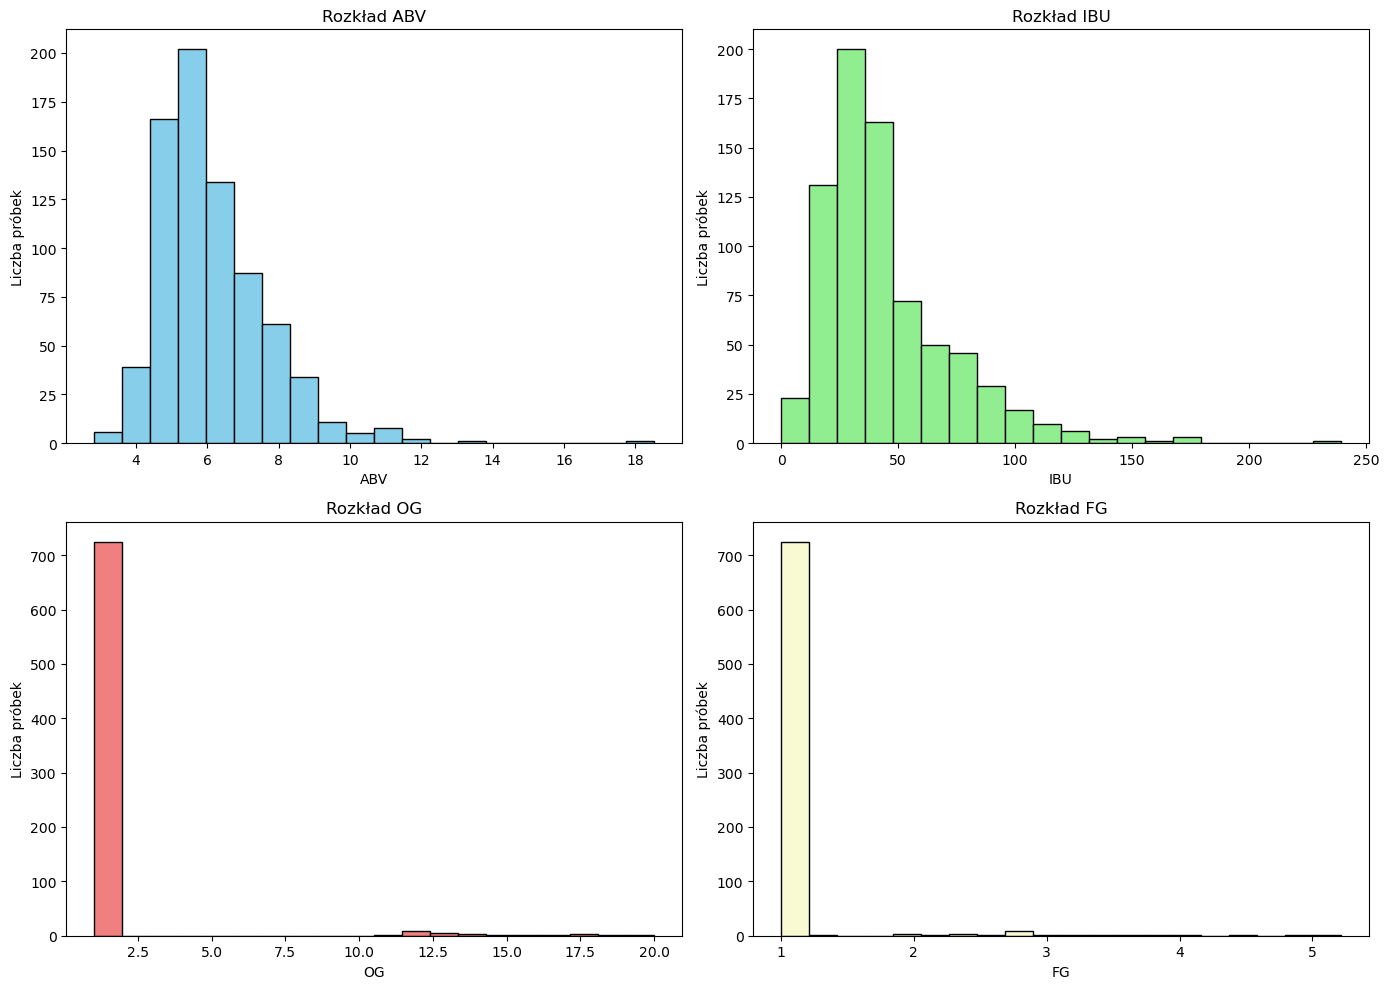

In [4]:
statystyki_opisowe = df[['ABV', 'IBU', 'OG', 'FG']].describe()
print(statystyki_opisowe)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].hist(df['ABV'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Rozkład ABV')
axs[0, 0].set_xlabel('ABV')
axs[0, 0].set_ylabel('Liczba próbek')

axs[0, 1].hist(df['IBU'], bins=20, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Rozkład IBU')
axs[0, 1].set_xlabel('IBU')
axs[0, 1].set_ylabel('Liczba próbek')

axs[1, 0].hist(df['OG'], bins=20, color='lightcoral', edgecolor='black')
axs[1, 0].set_title('Rozkład OG')
axs[1, 0].set_xlabel('OG')
axs[1, 0].set_ylabel('Liczba próbek')

axs[1, 1].hist(df['FG'], bins=20, color='lightgoldenrodyellow', edgecolor='black')
axs[1, 1].set_title('Rozkład FG')
axs[1, 1].set_xlabel('FG')
axs[1, 1].set_ylabel('Liczba próbek')

plt.tight_layout()
plt.show()

# Analiza Stylów Piwa
Analiza częstości występowania różnych stylów piwa, średnich parametrów dla każdego stylu i wizualizacja tych danych.

Najpopularniejsze style:
1. American IPA
2. American Pale Ale
3. Saison
4. American Amber Ale
5. Blonde Ale

Wizualizacje:
- Histogram częstości stylów
- Wykresy średnich parametrów dla każdego stylu
- Porównanie ABV, IBU, OG, FG między stylami

Style
American IPA                    108
American Pale Ale                59
American Amber Ale               28
Saison                           26
Blonde Ale                       25
                               ... 
Old Ale                           1
Mixed-Style Beer                  1
Kellerbier: Amber Kellerbier      1
Common Cider                      1
Irish Extra Stout                 1
Name: count, Length: 119, dtype: int64


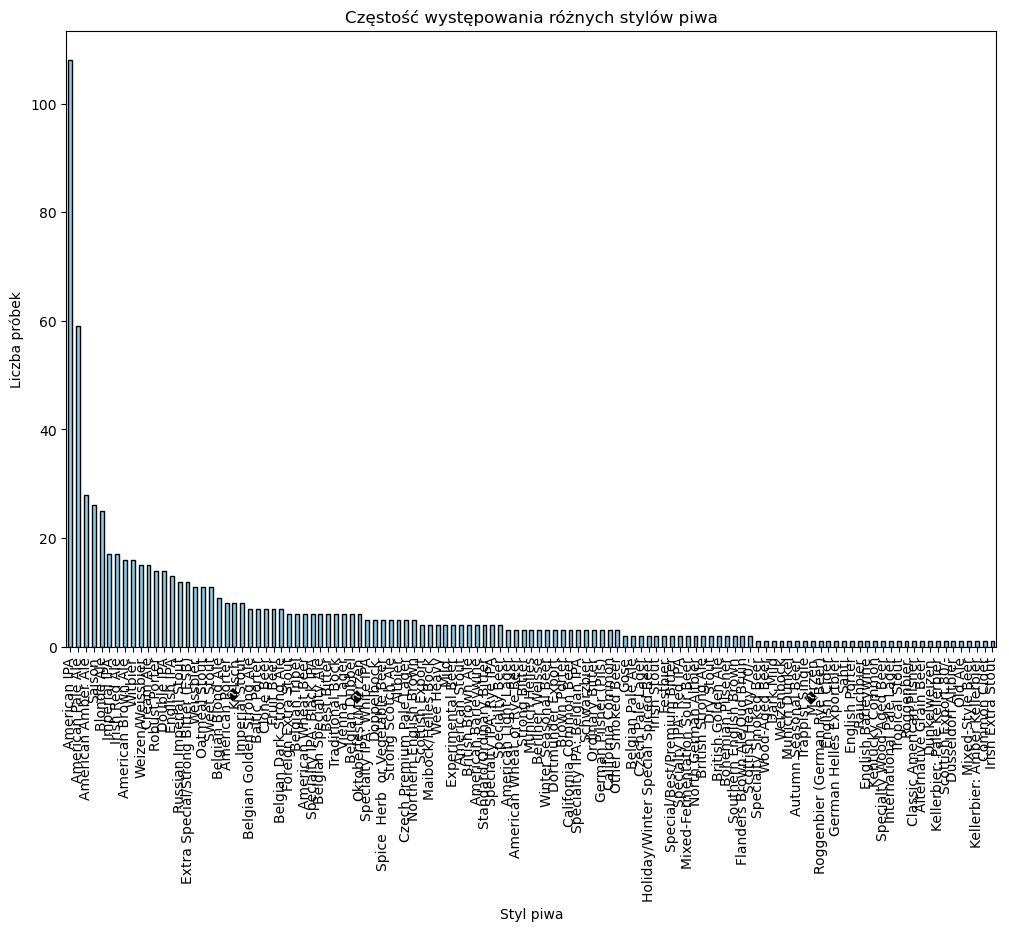

                              ABV         IBU        OG        FG
Style                                                            
Altbier                  5.054000   46.038000  8.124920  2.327580
Alternative Grain Beer   4.250000   52.250000  1.042000  1.010000
American Amber Ale       5.357857   35.774286  1.494932  1.058896
American Barleywine     10.085000  106.750000  1.098250  1.023750
American Brown Ale       5.872500   32.717500  1.058625  1.013875
...                           ...         ...       ...       ...
Weizen/Weissbier         4.887333   15.036667  1.765433  1.129295
Weizenbock               7.920000   22.590000  1.080000  1.020000
Winter Seasonal Beer     6.053333   33.003333  1.062000  1.017000
Witbier                  5.366250   22.822500  1.763500  1.083962
Wood-Aged Beer           9.700000   46.430000  1.082000  1.008000

[119 rows x 4 columns]


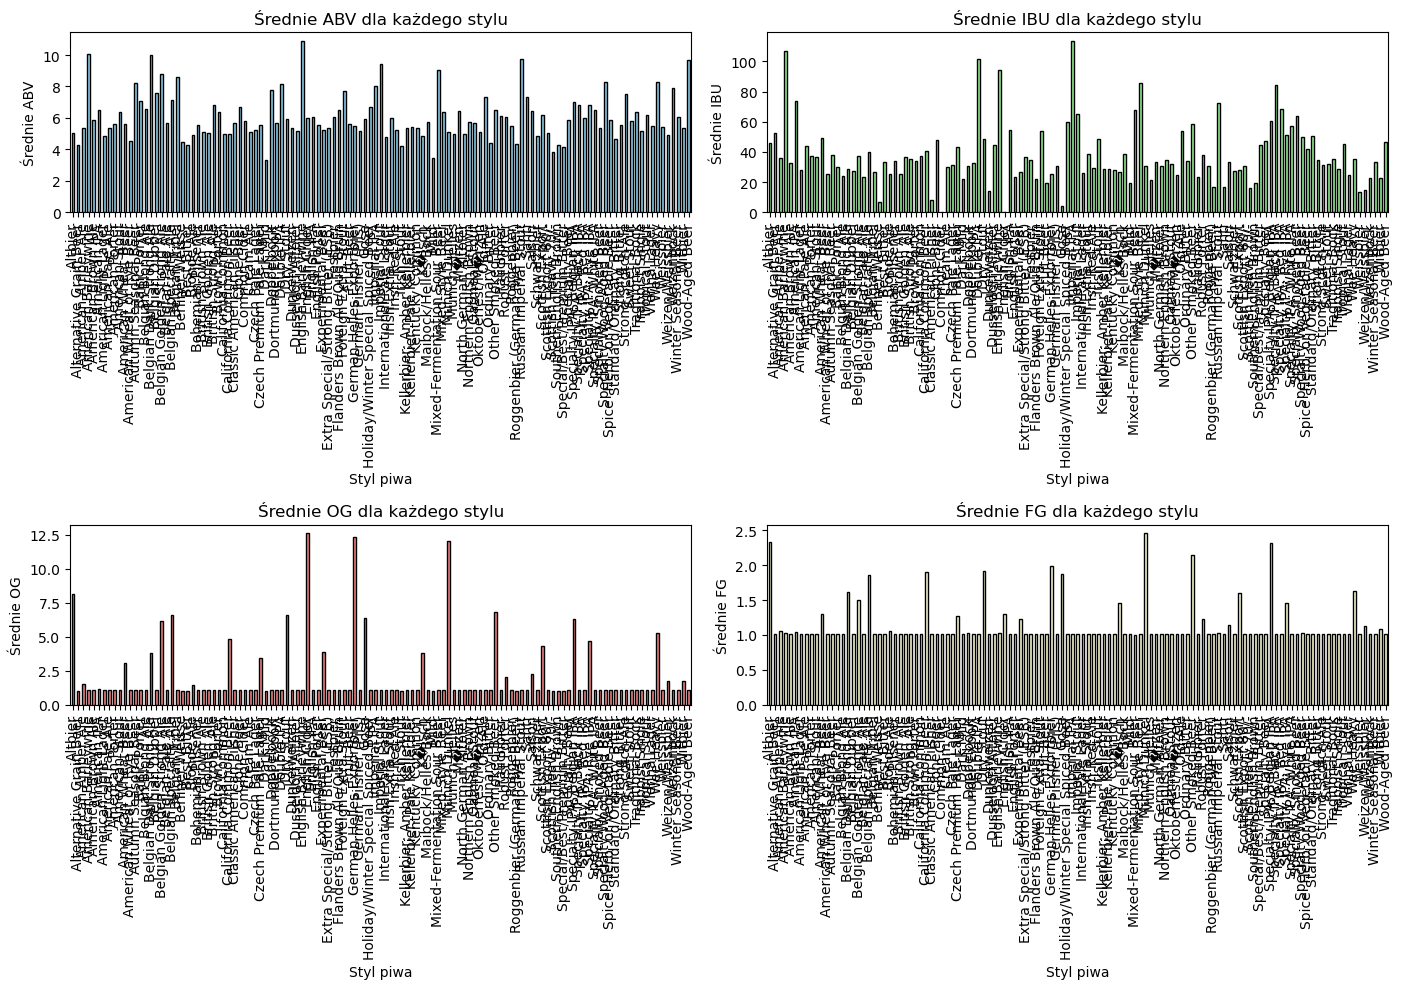

In [5]:
czestosc_stylow = df['Style'].value_counts()
print(czestosc_stylow)

plt.figure(figsize=(12, 8))
czestosc_stylow.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Częstość występowania różnych stylów piwa')
plt.xlabel('Styl piwa')
plt.ylabel('Liczba próbek')
plt.xticks(rotation=90)
plt.show()

srednie_parametry_stylow = df.groupby('Style')[['ABV', 'IBU', 'OG', 'FG']].mean()
print(srednie_parametry_stylow)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

srednie_parametry_stylow['ABV'].plot(kind='bar', ax=axs[0, 0], color='skyblue', edgecolor='black')
axs[0, 0].set_title('Średnie ABV dla każdego stylu')
axs[0, 0].set_xlabel('Styl piwa')
axs[0, 0].set_ylabel('Średnie ABV')
axs[0, 0].tick_params(axis='x', rotation=90)

srednie_parametry_stylow['IBU'].plot(kind='bar', ax=axs[0, 1], color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Średnie IBU dla każdego stylu')
axs[0, 1].set_xlabel('Styl piwa')
axs[0, 1].set_ylabel('Średnie IBU')
axs[0, 1].tick_params(axis='x', rotation=90)

srednie_parametry_stylow['OG'].plot(kind='bar', ax=axs[1, 0], color='lightcoral', edgecolor='black')
axs[1, 0].set_title('Średnie OG dla każdego stylu')
axs[1, 0].set_xlabel('Styl piwa')
axs[1, 0].set_ylabel('Średnie OG')
axs[1, 0].tick_params(axis='x', rotation=90)

srednie_parametry_stylow['FG'].plot(kind='bar', ax=axs[1, 1], color='lightgoldenrodyellow', edgecolor='black')
axs[1, 1].set_title('Średnie FG dla każdego stylu')
axs[1, 1].set_xlabel('Styl piwa')
axs[1, 1].set_ylabel('Średnie FG')
axs[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Korelacje Między Parametrami
Obliczenie i wizualizacja macierzy korelacji między parametrami piwa (ABV, IBU, OG, FG, Color).

Najsilniejsze korelacje:
- ABV-OG: silna dodatnia
- IBU-Color: umiarkowana dodatnia
- OG-FG: umiarkowana dodatnia

Wizualizacja:
- Heatmapa korelacji
- Skala kolorów: coolwarm
- Wartości od -1 do 1

            ABV       IBU        OG        FG     Color
ABV    1.000000  0.438261  0.041505  0.029891  0.328899
IBU    0.438261  1.000000 -0.060687 -0.046774  0.090905
OG     0.041505 -0.060687  1.000000  0.937380 -0.070310
FG     0.029891 -0.046774  0.937380  1.000000 -0.049352
Color  0.328899  0.090905 -0.070310 -0.049352  1.000000


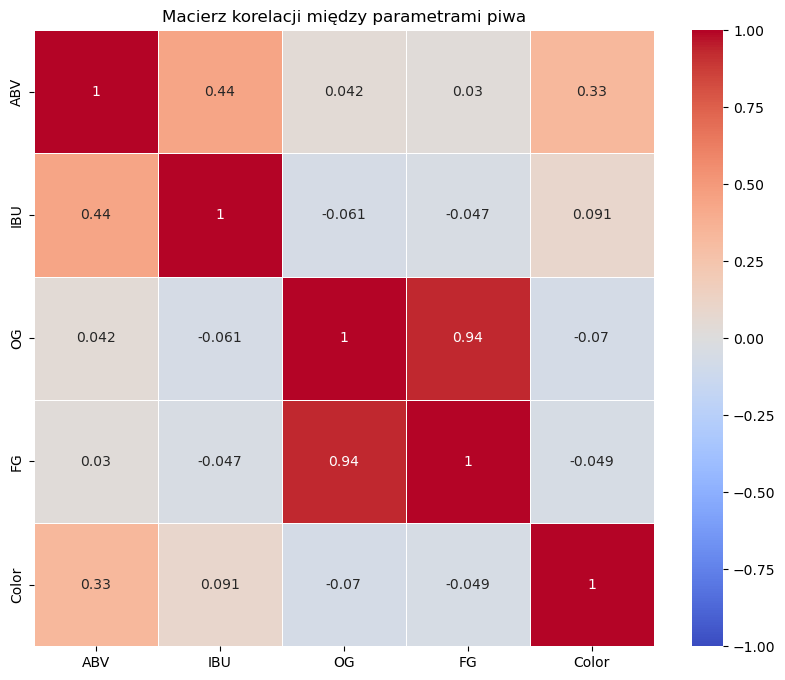

In [6]:
import seaborn as sns

korelacje = df[['ABV', 'IBU', 'OG', 'FG', 'Color']].corr()
print(korelacje)

plt.figure(figsize=(10, 8))
plt.title('Macierz korelacji między parametrami piwa')
sns.heatmap(korelacje, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.show()